# 8일차 - 신경망

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
iris = pd.read_csv('iris.csv')
iris

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
data = iris.iloc[:,:4].values
data.shape

(150, 4)

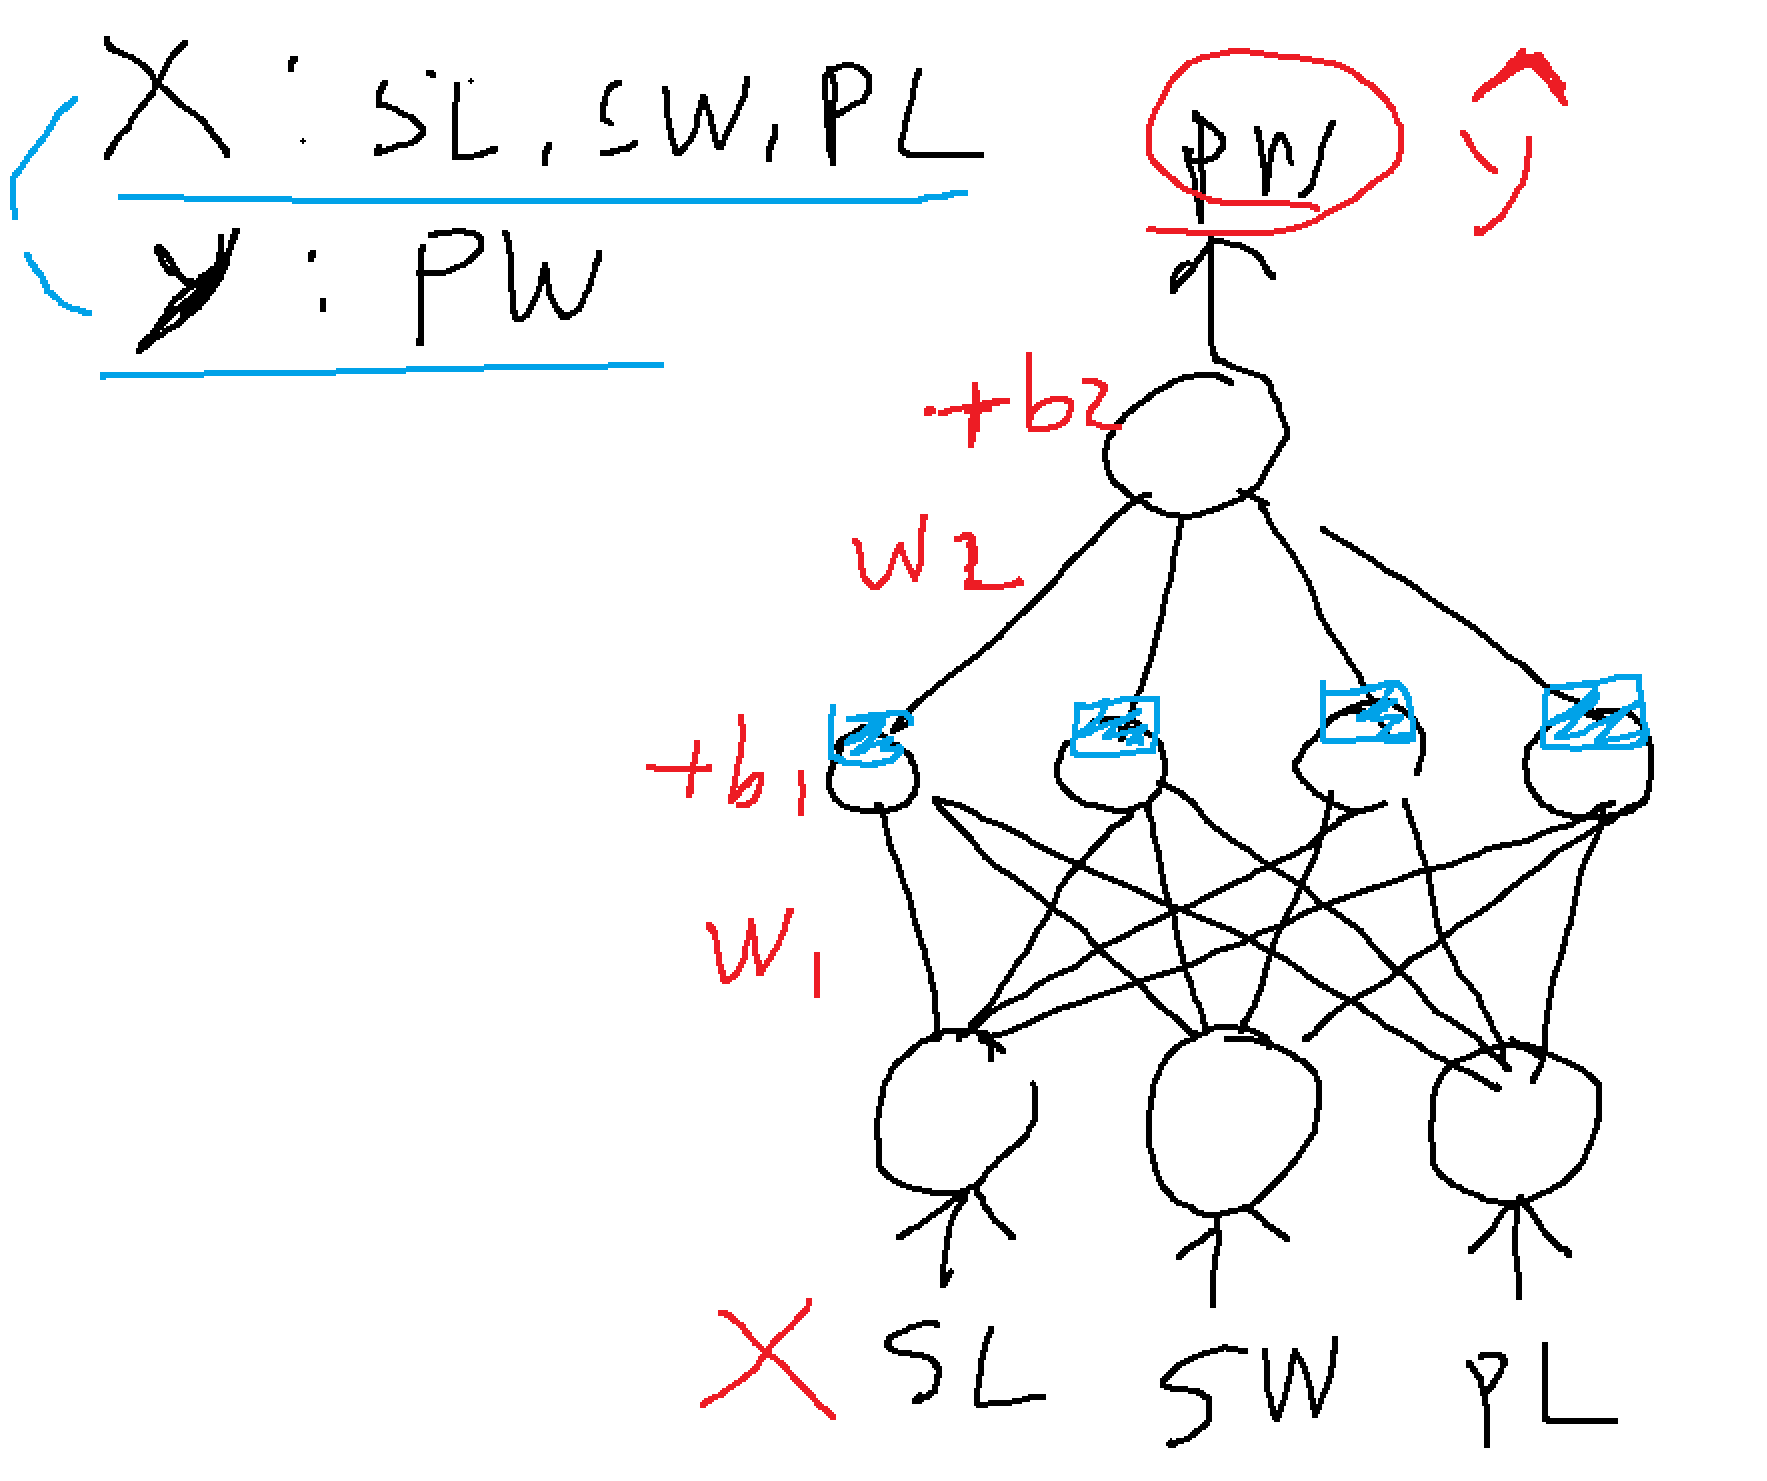

In [5]:
X = data[:, :3]
y = data[:, 3]
X.shape, y.shape

((150, 3), (150,))

In [6]:
W1 = np.random.randn(3, 4)
b1 = np.zeros(4)
W2 = np.random.randn(4)
b2 = 0.

In [7]:
def relu(x):
    return np.where(x>0, x, 0)

In [8]:
y1 = relu(X@W1 + b1)
y1.shape

(150, 4)

In [9]:
y_pred = y1@W2 + b2
y_pred.shape

(150,)

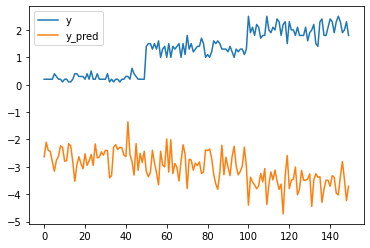

In [10]:
plt.plot(y)
plt.plot(y_pred)
plt.legend(['y', 'y_pred'])

In [12]:
mse = ((y - y_pred)**2).mean()
mse

19.50970470293454

In [13]:
y

array([0.2, 0.2, 0.2, 0.2, 0.2, 0.4, 0.3, 0.2, 0.2, 0.1, 0.2, 0.2, 0.1,
       0.1, 0.2, 0.4, 0.4, 0.3, 0.3, 0.3, 0.2, 0.4, 0.2, 0.5, 0.2, 0.2,
       0.4, 0.2, 0.2, 0.2, 0.2, 0.4, 0.1, 0.2, 0.1, 0.2, 0.2, 0.1, 0.2,
       0.2, 0.3, 0.3, 0.2, 0.6, 0.4, 0.3, 0.2, 0.2, 0.2, 0.2, 1.4, 1.5,
       1.5, 1.3, 1.5, 1.3, 1.6, 1. , 1.3, 1.4, 1. , 1.5, 1. , 1.4, 1.3,
       1.4, 1.5, 1. , 1.5, 1.1, 1.8, 1.3, 1.5, 1.2, 1.3, 1.4, 1.4, 1.7,
       1.5, 1. , 1.1, 1. , 1.2, 1.6, 1.5, 1.6, 1.5, 1.3, 1.3, 1.3, 1.2,
       1.4, 1.2, 1. , 1.3, 1.2, 1.3, 1.3, 1.1, 1.3, 2.5, 1.9, 2.1, 1.8,
       2.2, 2.1, 1.7, 1.8, 1.8, 2.5, 2. , 1.9, 2.1, 2. , 2.4, 2.3, 1.8,
       2.2, 2.3, 1.5, 2.3, 2. , 2. , 1.8, 2.1, 1.8, 1.8, 1.8, 2.1, 1.6,
       1.9, 2. , 2.2, 1.5, 1.4, 2.3, 2.4, 1.8, 1.8, 2.1, 2.4, 2.3, 1.9,
       2.3, 2.5, 2.3, 1.9, 2. , 2.3, 1.8])

In [14]:
y_pred

array([-2.63311406, -2.09997202, -2.39979874, -2.4387624 , -2.81171418,
       -3.15977656, -2.76296414, -2.6147042 , -2.2298221 , -2.2845373 ,
       -2.79064599, -2.77489446, -2.15138039, -2.23630164, -2.81310917,
       -3.52676318, -2.93028245, -2.63311406, -2.8783597 , -3.07206285,
       -2.52381778, -2.9448711 , -2.78785355, -2.55085113, -2.94701504,
       -2.1633107 , -2.67207772, -2.63907922, -2.45451394, -2.57191932,
       -2.39331919, -2.40907073, -3.40222975, -3.31782288, -2.2845373 ,
       -2.18820011, -2.37010706, -2.2845373 , -2.29964033, -2.56329583,
       -2.6271489 , -1.35788968, -2.55402384, -2.79926948, -3.30155696,
       -2.15138039, -3.12943638, -2.50858063, -2.84205436, -2.43013892,
       -3.16810619, -3.36180934, -3.20706986, -2.39289122, -2.85900748,
       -3.21290089, -3.65515652, -2.42691849, -2.93479087, -2.99850982,
       -1.98149016, -3.19234709, -2.00865763, -3.24920623, -2.87513928,
       -3.02301896, -3.51869277, -2.80480666, -2.19270852, -2.53

### 케라스 적용

In [15]:
import tensorflow as tf
from tensorflow import keras

In [17]:
model = keras.models.Sequential()

In [18]:
model.add(keras.layers.Dense(4, activation='relu', input_shape=(3,)))

In [19]:
model.add(keras.layers.Dense(1))

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 4)                 16        
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 5         
Total params: 21
Trainable params: 21
Non-trainable params: 0
_________________________________________________________________


In [21]:
model.compile(loss='mse', optimizer='sgd')

In [22]:
model.fit(X, y, batch_size=32, epochs=100)

Epoch 1/100
5/5 [==============================] - 3s 10ms/step - loss: 1.9063
Epoch 2/100
5/5 [==============================] - 0s 9ms/step - loss: 1.6878
Epoch 3/100
5/5 [==============================] - 0s 8ms/step - loss: 1.5049
Epoch 4/100
5/5 [==============================] - 0s 6ms/step - loss: 1.3486
Epoch 5/100
5/5 [==============================] - 0s 12ms/step - loss: 1.2163
Epoch 6/100
5/5 [==============================] - 0s 7ms/step - loss: 1.0989
Epoch 7/100
5/5 [==============================] - 0s 7ms/step - loss: 1.0008
Epoch 8/100
5/5 [==============================] - 0s 8ms/step - loss: 0.9138
Epoch 9/100
5/5 [==============================] - 0s 12ms/step - loss: 0.8445
Epoch 10/100
5/5 [==============================] - 0s 7ms/step - loss: 0.7850
Epoch 11/100
5/5 [==============================] - 0s 7ms/step - loss: 0.7339
Epoch 12/100
5/5 [==============================] - 0s 9ms/step - loss: 0.6891
Epoch 13/100
5/5 [==============================] - 0s 10m

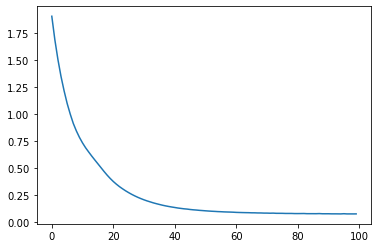

In [25]:
h = model.history.history
plt.plot(h['loss'])

In [26]:
y_pred = model.predict(X)
y_pred

array([[ 0.1770966 ],
       [ 0.30809152],
       [ 0.31267238],
       [ 0.4710759 ],
       [ 0.20648253],
       [ 0.17928886],
       [ 0.3859321 ],
       [ 0.2813089 ],
       [ 0.516927  ],
       [ 0.35196507],
       [ 0.09154177],
       [ 0.4149071 ],
       [ 0.347795  ],
       [ 0.38373947],
       [-0.26079905],
       [-0.099792  ],
       [-0.03747606],
       [ 0.1770966 ],
       [ 0.07049596],
       [ 0.2003349 ],
       [ 0.23087668],
       [ 0.21065247],
       [ 0.16234446],
       [ 0.3603052 ],
       [ 0.5774807 ],
       [ 0.37677038],
       [ 0.33550012],
       [ 0.19158411],
       [ 0.14771044],
       [ 0.47524607],
       [ 0.4458598 ],
       [ 0.12249422],
       [ 0.12967885],
       [-0.05394089],
       [ 0.35196507],
       [ 0.13937044],
       [-0.03590918],
       [ 0.35196507],
       [ 0.4524182 ],
       [ 0.24160528],
       [ 0.16260874],
       [ 0.48493767],
       [ 0.43178308],
       [ 0.32518244],
       [ 0.4170997 ],
       [ 0

In [27]:
y

array([0.2, 0.2, 0.2, 0.2, 0.2, 0.4, 0.3, 0.2, 0.2, 0.1, 0.2, 0.2, 0.1,
       0.1, 0.2, 0.4, 0.4, 0.3, 0.3, 0.3, 0.2, 0.4, 0.2, 0.5, 0.2, 0.2,
       0.4, 0.2, 0.2, 0.2, 0.2, 0.4, 0.1, 0.2, 0.1, 0.2, 0.2, 0.1, 0.2,
       0.2, 0.3, 0.3, 0.2, 0.6, 0.4, 0.3, 0.2, 0.2, 0.2, 0.2, 1.4, 1.5,
       1.5, 1.3, 1.5, 1.3, 1.6, 1. , 1.3, 1.4, 1. , 1.5, 1. , 1.4, 1.3,
       1.4, 1.5, 1. , 1.5, 1.1, 1.8, 1.3, 1.5, 1.2, 1.3, 1.4, 1.4, 1.7,
       1.5, 1. , 1.1, 1. , 1.2, 1.6, 1.5, 1.6, 1.5, 1.3, 1.3, 1.3, 1.2,
       1.4, 1.2, 1. , 1.3, 1.2, 1.3, 1.3, 1.1, 1.3, 2.5, 1.9, 2.1, 1.8,
       2.2, 2.1, 1.7, 1.8, 1.8, 2.5, 2. , 1.9, 2.1, 2. , 2.4, 2.3, 1.8,
       2.2, 2.3, 1.5, 2.3, 2. , 2. , 1.8, 2.1, 1.8, 1.8, 1.8, 2.1, 1.6,
       1.9, 2. , 2.2, 1.5, 1.4, 2.3, 2.4, 1.8, 1.8, 2.1, 2.4, 2.3, 1.9,
       2.3, 2.5, 2.3, 1.9, 2. , 2.3, 1.8])

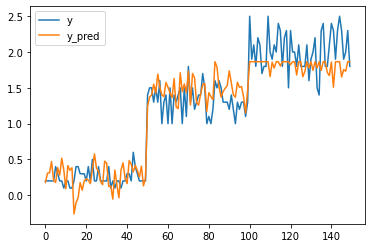

In [28]:
plt.plot(y)
plt.plot(y_pred)
plt.legend(['y', 'y_pred'])

### 아이리스 분류
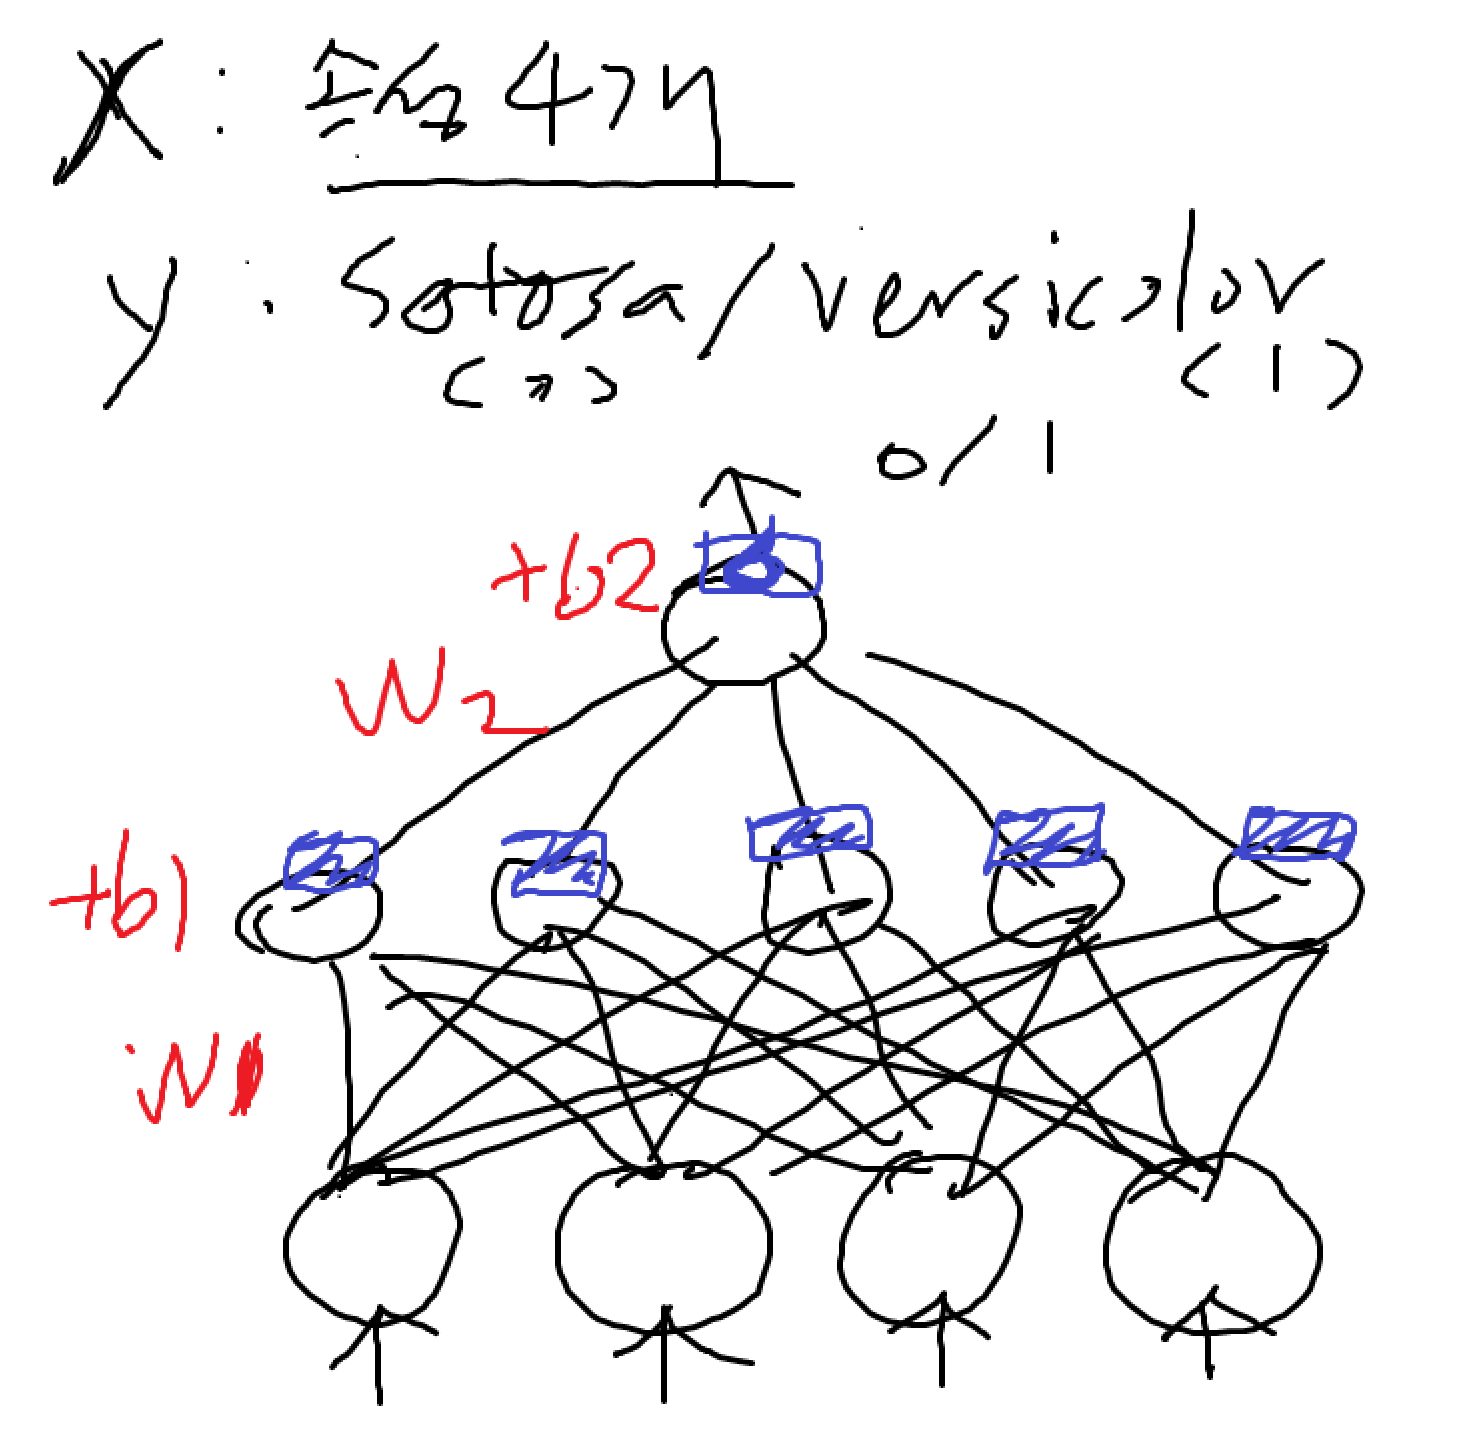

In [34]:
X = data[:100]
y = np.array([0]*50 + [1]*50)
X.shape, y.shape

((100, 4), (100,))

In [35]:
model = keras.models.Sequential()
model.add(keras.layers.Dense(5, activation='relu', input_shape=(4,)))
model.add(keras.layers.Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 5)                 25        
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 6         
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [36]:
model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['acc'])

model.fit(X, y, batch_size=32, epochs=100)

Epoch 1/100
4/4 [==============================] - 0s 8ms/step - loss: 0.8205 - acc: 0.3200
Epoch 2/100
4/4 [==============================] - 0s 10ms/step - loss: 0.7920 - acc: 0.4900
Epoch 3/100
4/4 [==============================] - 0s 11ms/step - loss: 0.7612 - acc: 0.4900
Epoch 4/100
4/4 [==============================] - 0s 13ms/step - loss: 0.7180 - acc: 0.5000
Epoch 5/100
4/4 [==============================] - 0s 10ms/step - loss: 0.6514 - acc: 0.5000
Epoch 6/100
4/4 [==============================] - 0s 21ms/step - loss: 0.5994 - acc: 0.5000
Epoch 7/100
4/4 [==============================] - 0s 16ms/step - loss: 0.5616 - acc: 0.5000
Epoch 8/100
4/4 [==============================] - 0s 21ms/step - loss: 0.5464 - acc: 0.5700
Epoch 9/100
4/4 [==============================] - 0s 11ms/step - loss: 0.5307 - acc: 0.7200
Epoch 10/100
4/4 [==============================] - 0s 13ms/step - loss: 0.5217 - acc: 1.0000
Epoch 11/100
4/4 [==============================] - 0s 6ms/step - loss

4/4 [==============================] - 0s 11ms/step - loss: 0.0957 - acc: 1.0000
Epoch 89/100
4/4 [==============================] - 0s 18ms/step - loss: 0.0940 - acc: 1.0000
Epoch 90/100
4/4 [==============================] - 0s 10ms/step - loss: 0.0922 - acc: 1.0000
Epoch 91/100
4/4 [==============================] - 0s 7ms/step - loss: 0.0903 - acc: 1.0000
Epoch 92/100
4/4 [==============================] - 0s 7ms/step - loss: 0.0888 - acc: 1.0000
Epoch 93/100
4/4 [==============================] - 0s 6ms/step - loss: 0.0872 - acc: 1.0000
Epoch 94/100
4/4 [==============================] - 0s 7ms/step - loss: 0.0856 - acc: 1.0000
Epoch 95/100
4/4 [==============================] - 0s 6ms/step - loss: 0.0842 - acc: 1.0000
Epoch 96/100
4/4 [==============================] - 0s 10ms/step - loss: 0.0828 - acc: 1.0000
Epoch 97/100
4/4 [==============================] - 0s 7ms/step - loss: 0.0814 - acc: 1.0000
Epoch 98/100
4/4 [==============================] - 0s 8ms/step - loss: 0.0801 

Text(0.5, 1.0, 'accuracy')

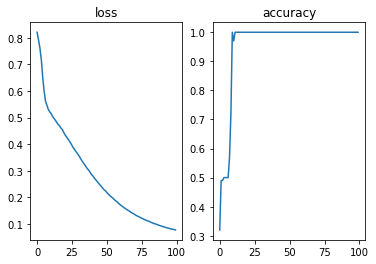

In [38]:
h = model.history.history
plt.subplot(1,2,1)
plt.plot(h['loss']); plt.title('loss')
plt.subplot(1,2,2)
plt.plot(h['acc']); plt.title('accuracy')

In [39]:
model.predict(X)

array([[0.06901562],
       [0.10642119],
       [0.08550326],
       [0.123808  ],
       [0.06607962],
       [0.08346935],
       [0.09489892],
       [0.08804914],
       [0.1330035 ],
       [0.10399228],
       [0.06188887],
       [0.10715911],
       [0.1009322 ],
       [0.07863586],
       [0.02804203],
       [0.03908618],
       [0.04782926],
       [0.07527106],
       [0.07503171],
       [0.06895877],
       [0.10175313],
       [0.08104413],
       [0.04286778],
       [0.1527671 ],
       [0.15791142],
       [0.13414925],
       [0.11899999],
       [0.07673299],
       [0.07207201],
       [0.12746328],
       [0.13273895],
       [0.0920898 ],
       [0.04447359],
       [0.03533419],
       [0.10399228],
       [0.06774589],
       [0.05273213],
       [0.10399228],
       [0.10866476],
       [0.08532386],
       [0.06768997],
       [0.18572186],
       [0.09393185],
       [0.13056512],
       [0.12849855],
       [0.11921338],
       [0.07259114],
       [0.100